<a href="https://colab.research.google.com/github/Mani512996/Data-Science-project/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdstanpy-1.1.0
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [5]:
df = pd.read_csv('Walmart.csv')


In [6]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [8]:
df.shape

(3203, 12)

In [16]:
df= df.drop(['Order ID','Order Date','Ship Date','Customer Name','Country','City','State','Category','Product Name'], axis=1)


KeyError: ignored

In [60]:
df.shape

(3203, 3)

In [61]:
train_size = int(len(df) * 0.8)

train_data, test_data = df.iloc[0:train_size, :], df.iloc[train_size:len(df), :]


In [62]:
train_data.shape

(2562, 3)

In [63]:
test_data.shape

(641, 3)

In [64]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [65]:
look_back = 12 # use 12 months of historical data for each prediction
train_X, train_Y = create_dataset(train_data[['Sales']].values, look_back)
test_X, test_Y = create_dataset(test_data[['Sales']].values, look_back)

In [66]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
model.fit(train_X, train_Y, epochs=50, batch_size=1, verbose=2)


Epoch 1/50
2550/2550 - 11s - loss: 240604.2812 - 11s/epoch - 4ms/step
Epoch 2/50
2550/2550 - 9s - loss: 225701.0469 - 9s/epoch - 4ms/step
Epoch 3/50
2550/2550 - 10s - loss: 217428.3594 - 10s/epoch - 4ms/step
Epoch 4/50
2550/2550 - 10s - loss: 212563.3281 - 10s/epoch - 4ms/step
Epoch 5/50
2550/2550 - 9s - loss: 209819.8750 - 9s/epoch - 4ms/step
Epoch 6/50
2550/2550 - 10s - loss: 209121.8125 - 10s/epoch - 4ms/step
Epoch 7/50
2550/2550 - 9s - loss: 208139.1094 - 9s/epoch - 4ms/step
Epoch 8/50
2550/2550 - 9s - loss: 208209.0469 - 9s/epoch - 4ms/step
Epoch 9/50
2550/2550 - 9s - loss: 207040.9688 - 9s/epoch - 4ms/step
Epoch 10/50
2550/2550 - 9s - loss: 206945.0312 - 9s/epoch - 4ms/step
Epoch 11/50
2550/2550 - 9s - loss: 206327.6719 - 9s/epoch - 4ms/step
Epoch 12/50
2550/2550 - 9s - loss: 206121.5781 - 9s/epoch - 4ms/step
Epoch 13/50
2550/2550 - 9s - loss: 207597.5938 - 9s/epoch - 4ms/step
Epoch 14/50
2550/2550 - 10s - loss: 207593.9844 - 10s/epoch - 4ms/step
Epoch 15/50
2550/2550 - 10s - los

In [113]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

20/20 [==============================] - 0s 3ms/step


In [114]:
from sklearn.preprocessing import StandardScaler


In [115]:
scaler = StandardScaler()


In [116]:
scaler.fit(train_predict)


StandardScaler()

In [117]:
import numpy as np


In [118]:
train_preditct = np.repeat(train_predict, 1, axis=1)
test_predict = np.repeat(test_predict, 1, axis=1)



In [119]:
train_predict = np.concatenate((train_predict, np.zeros((len(train_data) - len(train_predict), 1))), axis=0)
test_predict = np.concatenate((test_predict, np.zeros((len(test_data) - len(test_predict), 1))), axis=0)
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform([train_Y])
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform([test_Y])


In [120]:
train_predict = scaler.inverse_transform(train_predict)


In [122]:
test_predict = scaler.inverse_transform(test_predict)


In [128]:
df2 = pd.DataFrame(train_predict, columns=['Sales'])


In [130]:
df2.head(10)

,Sales
0,34383.350391
1,38562.995017
2,34740.499172
3,40156.169522
4,36112.115906
5,36446.598425
6,38962.791588
7,36388.893521
8,34401.722524
9,36483.378776


In [131]:
df3 = pd.DataFrame(test_predict, columns=['Sales'])


In [132]:
df3.head(10)

,Sales
0,33218.280024
1,35771.400284
2,33388.697977
3,34610.523007
4,37438.352003
5,36120.716190
6,38723.927396
7,37262.494821
8,33619.163960
9,34576.530832


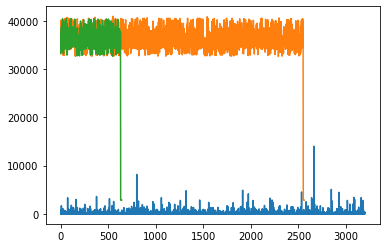

In [123]:
plt.plot(df['Sales'].values)
plt.plot(train_predict)
plt.plot(test_predict)
plt.show()


In [133]:
df2.to_csv('predicted.csv', index=False)


In [135]:
from google.colab import files

files.download('predicted.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>